# boston 데이터셋 활용 집값 예측 모델
- 데이터셋 : boston.csv에서 Feature 사용
- 구현 프레임 워크 : Pytorch

- [1] 모듈 로딩 및 데이터 준비

In [1]:
# 모듈 로딩
import torch                        # 텐서 및 수치 계산 함수 관련 모듈
import torch.nn as nn               # 인공신경망 관련 모듈
import torch.nn.functional as F     # 손실, 거리 등 함수 관련 모듈
import torch.optim as optim         # 최적화 기법 관련 모듈

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
torch.manual_seed(13)

In [3]:
data = '../../ML/DATA/boston.csv'
houseDF = pd.read_csv(data)
houseDF.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


[01]  CRIM 자치시(town) 별 1인당 범죄율

 [02]  ZN 25,000 평방피트를 초과하는 거주지역의 비율

 [03]  INDUS 비소매상업지역이 점유하고 있는 토지의 비율

 [04]  CHAS 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)

 [05]  NOX 10ppm 당 농축 일산화질소

 [06]  RM 주택 1가구당 평균 방의 개수 

 [07]  AGE 1940년 이전에 건축된 소유주택의 비율 

 [08]  DIS 5개의 보스턴 직업센터까지의 접근성 지수 

 [09]  RAD 방사형 도로까지의 접근성 지수 

 [10]  TAX 10,000 달러 당 재산세율 

 [11]  PTRATIO 자치시(town)별 학생/교사 비율

 [12]  B 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함. 

 [13]  LSTAT 모집단의 하위계층의 비율(%)

 [14]  MEDV 본인 소유의 주택가격(중앙값) (단위: $1,000)

In [4]:
houseDF.corr(numeric_only=True)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [5]:
# 상관계수의 절댓값이 0.4 이상인 열만 선택
houseDF = houseDF[['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']]

[2] 모델 준비
- 학습 방법 : 지도학습 > 회귀
- 알고리즘 : 선형관계 >> 선형모델 ==> nn.Linear

In [6]:
# in_features : INDUS, NOX, RM, TAX, PTRATIO, LSTAT
# out_features : MEDV
model = nn.Linear(6,1)

In [7]:
# 가중치와 절편 확인
for name, param in model.named_parameters():
    print(f'[{name}] {param}\n')

[weight] Parameter containing:
tensor([[-0.3333, -0.0168,  0.2536, -0.3959, -0.3958,  0.0846]],
       requires_grad=True)

[bias] Parameter containing:
tensor([-0.2190], requires_grad=True)



[3] 최적화 인스턴스 준비

In [8]:
## 모델의 가중치와 절편을 최적화해 인스턴스에 전달
adam_optim = optim.Adam(model.parameters(), lr=0.25)

[4] 학습 ==> 개발자가 구현

- [4-1] 데이터셋 Tensor화 진행 : 데이터 준비시 진행하거나 학습 전 진행

In [9]:
featureTS = torch.from_numpy(houseDF[['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']].values).float()
featureTS.shape

torch.Size([506, 6])

In [10]:
targetTS = torch.from_numpy(houseDF[['MEDV']].values).float()
targetTS.shape

torch.Size([506, 1])

In [11]:
# train/test
X_train, X_test, y_train, y_test = train_test_split(featureTS, targetTS, test_size=0.2)

# train/validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

print(f'[Feature] TRAIN {X_train.shape}, TEST {X_test.shape}, VAL {X_val.shape}')
print(f'[Target]  TRAIN {y_train.shape}, TEST {y_test.shape}, VAL {y_val.shape}')

[Feature] TRAIN torch.Size([323, 6]), TEST torch.Size([102, 6]), VAL torch.Size([81, 6])
[Target]  TRAIN torch.Size([323, 1]), TEST torch.Size([102, 1]), VAL torch.Size([81, 1])


- [4-2] 학습 진행
    - 학습 횟수 결정 ==> 에포크 설정
    - 학습 결과 저장 ==> 손실 저장 변수

In [12]:
Epoch = 50

In [13]:
# 테스트/검증 함수
def testing(testTS, targetTS, kind='Val'):
    with torch.no_grad():
        # 학습 진행 - forward
        pre_y = model(testTS)
        print(f'{pre_y.shape}')
        # 오차계산 - 손실함수
        loss = F.mse_loss(pre_y, targetTS)
        # 학습 결과 출력 및 저장
        print(f'[{kind}] Loss : {loss}')
    return loss

In [14]:
# 모델 학습 함수
def training(featureTS, targetTS, valTS, valTargetTS):
    loss_history = {'loss' : [], 'val':[]}

    for epoch in range(Epoch):
        # 학습 진행 - forward
        pre_y = model(featureTS)

        # 오차계산 - 손실 함수
        loss = F.mse_loss(pre_y, targetTS)
        loss_history['loss'].append(loss.item())

        # 최적화 - 가중치, 절편, 업데이트 backward
        adam_optim.zero_grad()
        loss.backward()
        adam_optim.step()

        # 검증 -  모델이 제대로 만들어지는지 검사
        val = testing(valTS, valTargetTS)
        loss_history['val'].append(val.item())

        # 학습 결과 출력 및 저장
        print(f'[{epoch}/{Epoch}] Loss : {loss}')
    return loss_history

In [15]:
# 모델 학습 진행
loss = training(X_train, y_train, X_val, y_val)

torch.Size([81, 1])
[Val] Loss : 6468.572265625
[0/50] Loss : 41833.8515625
torch.Size([81, 1])
[Val] Loss : 1194.665771484375
[1/50] Loss : 6649.62939453125
torch.Size([81, 1])
[Val] Loss : 11165.0244140625
[2/50] Loss : 1155.1669921875
torch.Size([81, 1])
[Val] Loss : 16711.365234375
[3/50] Loss : 11156.275390625
torch.Size([81, 1])
[Val] Loss : 13443.564453125
[4/50] Loss : 16742.35546875
torch.Size([81, 1])
[Val] Loss : 6556.55322265625
[5/50] Loss : 13449.150390625
torch.Size([81, 1])
[Val] Loss : 1354.758544921875
[6/50] Loss : 6519.87451171875
torch.Size([81, 1])
[Val] Loss : 379.1907653808594
[7/50] Loss : 1313.4124755859375
torch.Size([81, 1])
[Val] Loss : 2884.043701171875
[8/50] Loss : 391.0174255371094
torch.Size([81, 1])
[Val] Loss : 5963.00927734375
[9/50] Loss : 2984.580810546875
torch.Size([81, 1])
[Val] Loss : 7061.9384765625
[10/50] Loss : 6139.64404296875
torch.Size([81, 1])
[Val] Loss : 5677.37158203125
[11/50] Loss : 7264.14306640625
torch.Size([81, 1])
[Val] Loss 

In [16]:
loss

{'loss': [41833.8515625,
  6649.62939453125,
  1155.1669921875,
  11156.275390625,
  16742.35546875,
  13449.150390625,
  6519.87451171875,
  1313.4124755859375,
  391.0174255371094,
  2984.580810546875,
  6139.64404296875,
  7264.14306640625,
  5849.53466796875,
  3143.472412109375,
  882.96142578125,
  198.17311096191406,
  1075.7838134765625,
  2535.56396484375,
  3408.024658203125,
  3133.956787109375,
  1999.7066650390625,
  783.3399047851562,
  185.0110626220703,
  406.8618469238281,
  1095.1087646484375,
  1650.5733642578125,
  1667.73876953125,
  1175.2269287109375,
  542.0269165039062,
  174.93605041503906,
  239.19195556640625,
  579.9915771484375,
  876.20947265625,
  893.0543823242188,
  636.5465087890625,
  310.6571350097656,
  138.96592712402344,
  198.73895263671875,
  385.2804870605469,
  517.1659545898438,
  485.42730712890625,
  325.57305908203125,
  167.509765625,
  120.01866149902344,
  188.63284301757812,
  286.80035400390625,
  319.2977600097656,
  260.61581420898

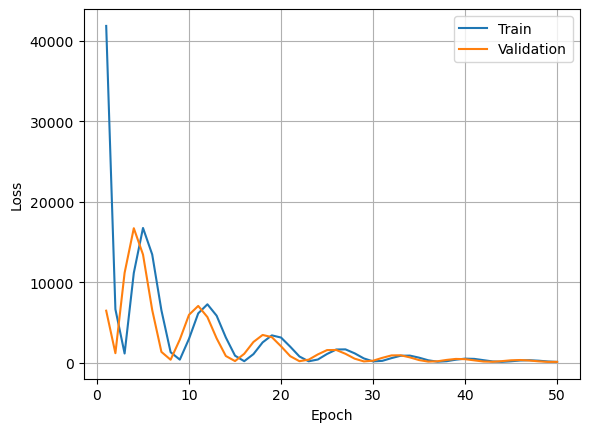

In [17]:
# 학습 후 loss 시각화
plt.plot(range(1,51), loss['loss'], label = 'Train')
plt.plot(range(1,51), loss['val'], label='Validation')
plt.grid('--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()